In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as c

/tmp/ipykernel_4201/3021060928.py:3: RuntimeWarning: invalid value encountered in sqrt
  return A*np.pi*np.sqrt(Eb)*np.heaviside(x-Eg,0)/(1-np.exp((-np.pi*2*np.sqrt(Eb/(x-Eg)))))


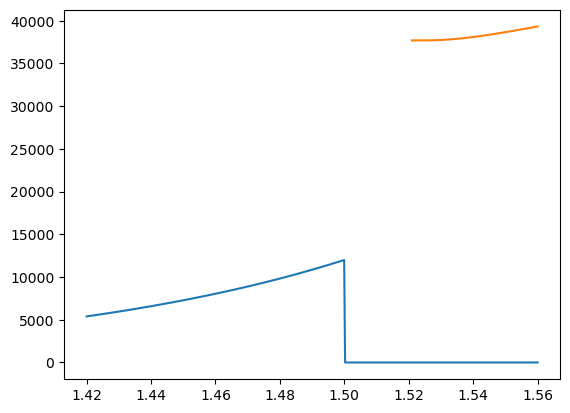

In [10]:
x = np.linspace(1.42,1.56,500)
def elliot(x,Eb,Eg,A):
    return A*np.pi*np.sqrt(Eb)*np.heaviside(x-Eg,0)/(1-np.exp((-np.pi*2*np.sqrt(Eb/(x-Eg)))))
def Urbach(x,sigma,E0,alpha0):
    return np.heaviside(E0-x,0)*alpha0*np.exp(-sigma*(E0-x))
fig,ax = plt.subplots()
ax.plot(x,Urbach(x,10,1.5,12000))
ax.plot(x,elliot(x,.010,1.521,120000))